## Movie Recommender System

In [1]:
# import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the data 
df = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
#take a look at dataframe
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
#take a look at how many rows and columns 
df.shape

(1000, 12)

In [5]:
#take a look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
#take a look at means of values
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
#take a look at the names of all the columns
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [8]:
#create a copy of data frame for later use and convert metacritic rating to separate dataframe to match to users
df_copy = df.copy()
df_copy2 = df_copy.copy()

In [9]:
values={'Revenue (Millions)':83, 'Metascore':59}
df_copy.fillna(value=values, inplace=True)
df_copy2.fillna(value=values, inplace=True)
print(df_copy.isnull().sum())
print(df_copy2.isnull().sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64
Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


In [10]:
#create two dataframes to be used later for recommender systems and ratings
#since there is no user info use audience and critic ratings as separate users
df_copy.drop('Metascore', axis=1, inplace=True)
df_copy2.drop("Rating", axis=1, inplace=True)
df_copy2['Metascore'] = df_copy2['Metascore']/10
df_copy2['Rating'] = df_copy2['Metascore']
df_copy2.drop('Metascore', axis=1, inplace=True)
df_copy.drop(df.index[792], inplace=True)
df_copy.drop(df.index[632], inplace=True)
df_copy.drop(df.index[42], inplace=True)
df_copy2.drop(df.index[792], inplace=True)
df_copy2.drop(df.index[632], inplace=True)
df_copy2.drop(df.index[42], inplace=True)
print(df_copy.shape)
print(df_copy2.shape)

(997, 11)
(997, 11)


In [11]:
#create two lists to use as users for audience ratings and users for metacritic ratings
l = list(range(1,998))
print(len(l))
l2 = list(range(998,1995))
print(len(l2))
df_copy['proxy_user_id'] = l
df_copy2['proxy_user_id'] = l2

997
997


In [12]:
#make sure all the movies in the datset are unique values and remove replicates
title = df.Title.unique()
len(title)
df.loc[df.Title=='The Host'].index.values

array([239, 632], dtype=int64)

In [13]:
#drop repeating rows
df.drop(df.index[792], inplace=True)
df.drop(df.index[632], inplace=True)
df.drop(df.index[42], inplace=True)
df.shape

(997, 12)

### Even though the movie The Host appears in this list twice, they are two different movies therefore all 1000 movies are unique.

In [14]:
#look for any missing data 
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    127
Metascore              63
dtype: int64

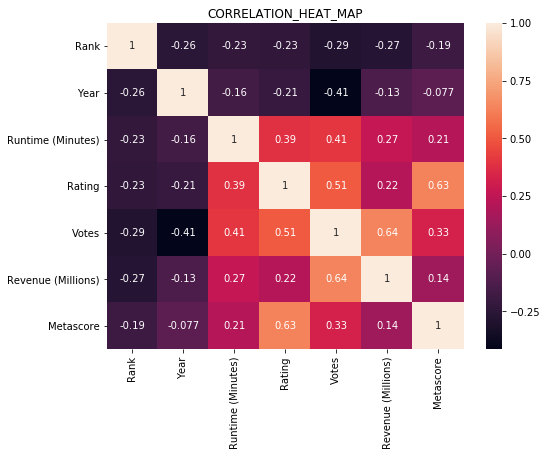

In [15]:
#look for trends/correlations by plotting a correlation heatmap
plt.subplots(figsize=(8,6))
ax = plt.axes()
ax.set_title("CORRELATION_HEAT_MAP")
corr = df.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

### According to the correlation heat map, there is an indirect correlation between year and votes which could indicate the older movies are getting less votes.  There is also a direct correlation between votes and revenue indicating high revenue movies are getting more votes.  Finally, there is a high correlation between metascore and ratings indicating that the critic's ratings in general match the audience's ratings.  There is also an interesting indirect correlation between runtime minutess and rank indicating that longer movies are not ranked as well as shorter movies.

In [16]:
#take a look at the number of movies for each year 
df.Year.value_counts()

2016    296
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2009     51
2008     51
2006     43
Name: Year, dtype: int64

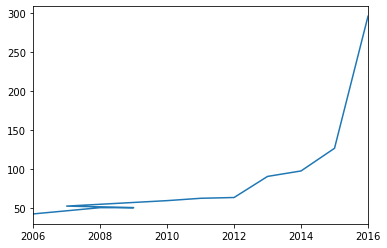

In [17]:
#plot the number of movies represented in this datset by the year
df.Year.value_counts().plot()

### This shows that the majority of movies in the dataset are from 2016.  

In [18]:
#take a look at value counts for movie genres
df.Genre.value_counts().head(20)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                25
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Action,Adventure,Comedy       14
Adventure,Family,Fantasy      14
Biography,Drama,History       14
Biography,Drama               14
Action,Comedy,Crime           12
Name: Genre, dtype: int64

### The value counts indicate there are a lot of action, adventure and drama movies but by separating the genres into separate rows it will be easier to analyze the genres.

In [19]:
# break up the genre of movies on new dataframe
df1 = df.Genre
type(df1)

pandas.core.series.Series

In [20]:
#split up column values by the comma 
s = df1.str.split(',', expand=True)
type(s)

pandas.core.frame.DataFrame

In [21]:
#label the columns
s.columns = ['Genre1', 'Genre2', 'Genre3']
s.head()

,Genre1,Genre2,Genre3
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy


In [22]:
#take a look at the value counts for genre in column 1 
s.Genre1.value_counts()

Action       293
Drama        195
Comedy       173
Adventure     75
Crime         71
Biography     64
Animation     49
Horror        45
Mystery       13
Thriller      10
Fantasy        4
Sci-Fi         3
Romance        2
Name: Genre1, dtype: int64

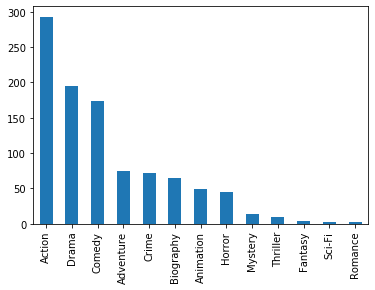

In [23]:
#plot the genre value counts for column 1
s.Genre1.value_counts().plot(kind='bar')

In [24]:
#take a look at the value counts for genre in column 2 
s.Genre2.value_counts()

Drama        237
Adventure    175
Romance       68
Comedy        62
Crime         58
Thriller      52
Mystery       49
Horror        49
Fantasy       35
Sci-Fi        28
Family        27
Biography     15
Action        10
History        8
Music          8
Sport          5
War            4
Western        2
Musical        1
Name: Genre2, dtype: int64

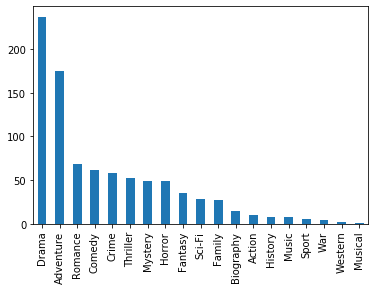

In [25]:
#plot the genre value counts for column 2 
s.Genre2.value_counts().plot(kind='bar')

In [26]:
#take a look at the value counts for genre for column 3 
s.Genre3.value_counts()

Thriller     133
Sci-Fi        89
Drama         80
Romance       70
Fantasy       62
Mystery       44
Comedy        42
Family        24
Horror        23
Crime         21
History       21
Sport         13
Adventure      9
War            9
Music          8
Western        5
Musical        4
Biography      2
Name: Genre3, dtype: int64

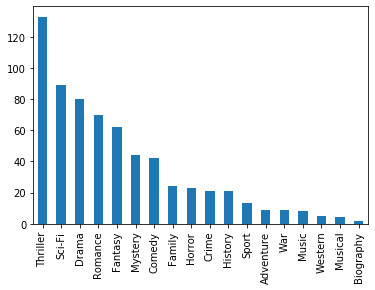

In [27]:
#plot the genre value counts for column 3 
s.Genre3.value_counts().plot(kind='bar')

### According to the visualizations the majority of movies are in the genre Drama.  

In [28]:
# take a look at which directors are seen the most in this dataset
df.Director.value_counts().head(20)

Ridley Scott          8
M. Night Shyamalan    6
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Peter Berg            5
Woody Allen           5
J.J. Abrams           5
Zack Snyder           5
David Fincher         5
Justin Lin            5
Martin Scorsese       5
Denis Villeneuve      5
Antoine Fuqua         5
Danny Boyle           5
Christopher Nolan     5
Guillermo del Toro    4
Paul Feig             4
Clint Eastwood        4
Nicholas Stoller      4
Name: Director, dtype: int64

In [29]:
#take a look at how the dataframe looks for the top rated directors
df.groupby('Director').count().sort_values('Rating', ascending=False).head()

,Rank,Title,Genre,Description,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Director,,,,,,,,,,,
Ridley Scott,8,8,8,8,8,8,8,8,8,8,8
David Yates,6,6,6,6,6,6,6,6,6,6,6
Michael Bay,6,6,6,6,6,6,6,6,6,6,6
Paul W.S. Anderson,6,6,6,6,6,6,6,6,6,6,6
M. Night Shyamalan,6,6,6,6,6,6,6,6,6,5,6


### According to the groupby, Director Ridley Scott's movies have the highest ratings.  

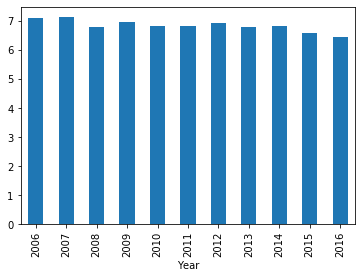

In [30]:
#take a look at ratings by the year of the movie
df.groupby('Year').Rating.mean().plot(kind='bar')

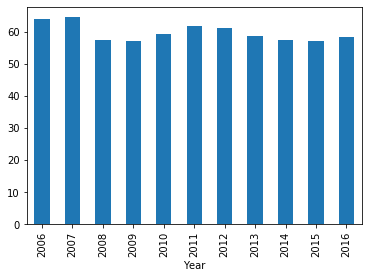

In [31]:
#take a look at the critics ratings by the year of the movie
df.groupby('Year').Metascore.mean().plot(kind='bar')

### According to both the audience rating bar graph and the critic ratings bar graph, the highest ratings occured in 2007.  

In [32]:
#take a look at mean and different trends for column values 
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,997.000000,997.000000,997.000000,997.000000,9.970000e+02,870.000000,934.000000
mean,500.532598,2012.791374,113.217653,6.727081,1.700896e+05,83.108402,58.960385
std,288.711356,3.198363,18.790906,0.938173,1.889451e+05,103.321101,17.191798
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,251.000000,2010.000000,100.000000,6.200000,3.631200e+04,13.325000,47.000000
50%,500.000000,2014.000000,111.000000,6.800000,1.108250e+05,48.030000,59.500000
75%,750.000000,2016.000000,123.000000,7.400000,2.403230e+05,113.725000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [33]:
#the minimum number of votes is 61 and the 25% quartile is 36,300 while the 75% quartile is 240,000
df.Votes.median()

110825.0

### The median votes are 110,799 and the 25% threshold is at 36,300 votes.  The max movie rating is 9 and the min movie rating is only 1.9 with an average rating of 6.7.  The max critic rating is 100% while the min critic rating is 11% and the average critic rating is 58%.  

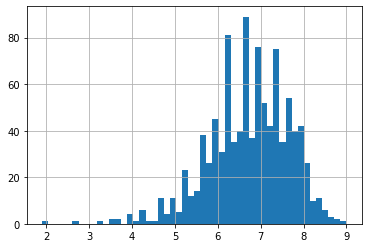

In [34]:
#take a look at the trends for the features ratings, votes and title;plot histogram of ratings
df3 = df.drop(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Revenue (Millions)','Metascore'], axis=1)
df3['Rating'].hist(bins=50)

### Most movies are rated around a 6.7. 

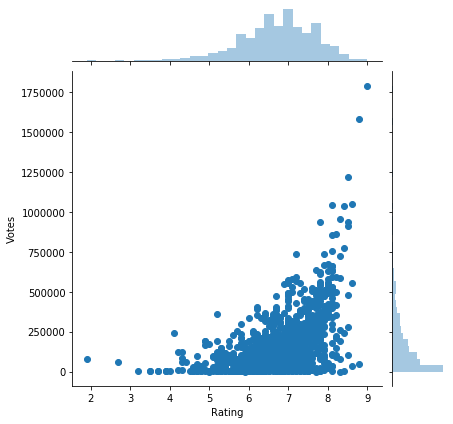

In [35]:
#plot histogram of ratings and votes
sns.jointplot(x='Rating', y="Votes", data=df3)

### Movies with better ratings have more votes.

In [36]:
#in order to create threshold for recommender system take a look at the low votes
low_votes = df[df['Votes'] <= 40000.0]
len(low_votes)

261

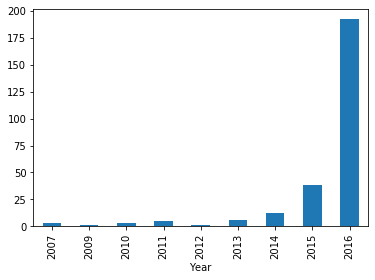

In [37]:
#plot the low votes against the year of the movie
low_votes.groupby('Year').Votes.count().plot(kind='bar')

### There are many low vote movies in 2016.  This could indicate that in 2016 when this dataset was created, the votes had just started on certain 2016 movies and thus may not be an accurate representation of the true votes for that movie.

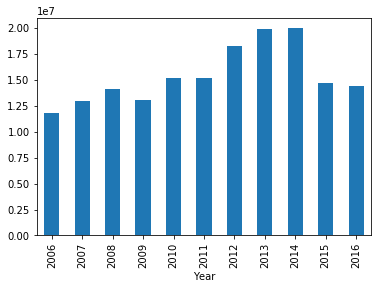

In [38]:
#plot all the votes by the year of the movie
df.groupby('Year').Votes.sum().plot(kind='bar')

### The most votes for movies occured in years 2012, 2013 and 2014.

REVENUE BASED ON CRITICS METASCORE


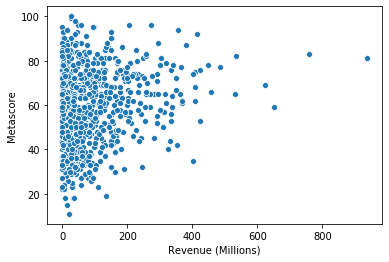

In [39]:
#plot the revenue against the crtics metascores
sns.scatterplot(y='Metascore', x='Revenue (Millions)', data=df)
print('REVENUE BASED ON CRITICS METASCORE')

### This shows that the highest revenue movies are also ones that have a higher metascore but it also shows that there are a lot of lower revenue movies with a high metascore.  This could indicate that there were movies rated very highly by critics but that did not do well at the box office.

REVENUE BASED ON AUDIENCE RATINGS


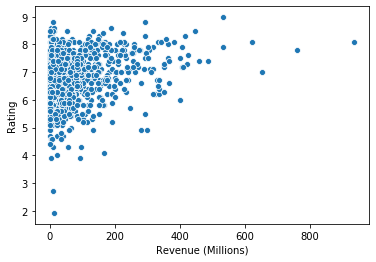

In [40]:
#let's see how revenue compares to the the audience Ratings
sns.scatterplot(y='Rating', x='Revenue (Millions)', data=df)
print('REVENUE BASED ON AUDIENCE RATINGS')

### The plot shows there is few low revenue grossing movies with a low audience rating. However, there is still a lot of movies that grossed less but had a high audience rating.  This shows that movies that are rated well whether by critics or by the audience, do not necessarily gross high in the box office.  

In [41]:
#take a look at the subset of highest revenue movies and look for trends
high_revenue = df[df['Revenue (Millions)'] >= 410.0]
high_revenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
78,79,Pirates of the Caribbean: Dead Man's Chest,"Action,Adventure,Fantasy",Jack Sparrow races to recover the heart of Dav...,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",2006,151,7.3,552027,423.03,53.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0


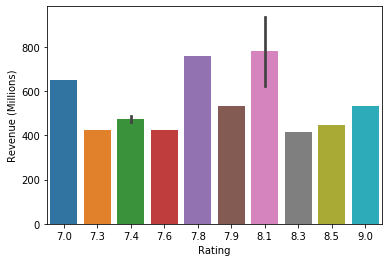

In [42]:
#take a look at how high revenue subset of movies relate to ratings 
_ = sns.barplot(x='Rating', y='Revenue (Millions)', data=high_revenue)

### Movies with the highest ratings are not necessarily the highest grossing movies at the box office.

In [43]:
#create a separate dataframe to take a look at the upper threshold of highly rated movies
high_ratings = df[df['Rating'] >= 8.5]
high_ratings

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0


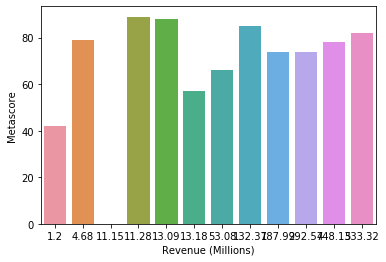

In [44]:
#take a look at the revenue and critics ratings of highly audience rated movies
_ = sns.barplot(x='Revenue (Millions)', y='Metascore', data=high_ratings)

### Highly rated movies that also have a high metascore are not necessarily high grossing movies.

In [45]:
#concat the the audience user ratings with the critics user ratings 
df_concat = pd.concat([df_copy, df_copy2])
df_concat.head()

,Actors,Description,Director,Genre,Rank,Rating,Revenue (Millions),Runtime (Minutes),Title,Votes,Year,proxy_user_id
0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",A group of intergalactic criminals are forced ...,James Gunn,"Action,Adventure,Sci-Fi",1,8.1,333.13,121,Guardians of the Galaxy,757074,2014,1
1,"Noomi Rapace, Logan Marshall-Green, Michael Fa...","Following clues to the origin of mankind, a te...",Ridley Scott,"Adventure,Mystery,Sci-Fi",2,7.0,126.46,124,Prometheus,485820,2012,2
2,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"Horror,Thriller",3,7.3,138.12,117,Split,157606,2016,3
3,"Matthew McConaughey,Reese Witherspoon, Seth Ma...","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Animation,Comedy,Family",4,7.2,270.32,108,Sing,60545,2016,4
4,"Will Smith, Jared Leto, Margot Robbie, Viola D...",A secret government agency recruits some of th...,David Ayer,"Action,Adventure,Fantasy",5,6.2,325.02,123,Suicide Squad,393727,2016,5


### Create a recommender system based on ratings of critics and general audience to choose similar movies.

In [46]:
#in order to create recommender system based on ratings, create new pivoted data frame
movie = df_concat.pivot_table(index='proxy_user_id', columns='Title', values ='Rating')
movie.head()

Title,(500) Days of Summer,10 Cloverfield Lane,10 Years,12 Years a Slave,127 Hours,13 Hours,1408,17 Again,2012,20th Century Women,...,Yoga Hosers,You Don't Mess with the Zohan,Your Highness,Youth,Zero Dark Thirty,Zipper,Zodiac,Zombieland,Zoolander 2,Zootopia
proxy_user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#take a look at the audience vs critic rating for the movie Avatar
movie.Avatar.value_counts()

8.3    1
7.8    1
Name: Avatar, dtype: int64

In [48]:
#create series for movies with ratings of Xmen days of future past
future_user_rating = movie['X-Men: Days of Future Past']
future_user_rating.value_counts()

7.4    1
8.0    1
Name: X-Men: Days of Future Past, dtype: int64

In [49]:
#create series for movies with ratings of Xmen Apocalypse
xmen_user_rating = movie['X-Men: Apocalypse']
xmen_user_rating.value_counts()

7.1    1
5.2    1
Name: X-Men: Apocalypse, dtype: int64

In [50]:
#use correlation of means of both movie series to find similarly rated movies
def corr_rating(r1,r2):
    r1_m = r1.mean()
    r2_m = r2.mean()
    return r1_m / r2_m

In [53]:
def recommend(film, frame, number):
    reviews=[]
    for title in frame.columns:
        if title == film:
            continue
        cor= corr_rating(frame[film], frame[title])
        if cor == 1:
            reviews.append((title, cor))
    return reviews[:number]

In [54]:
#get recommendations for movie Avatar
recs = recommend('Avatar',movie,10)
recs

[('Arrival', 1.0),
 ('Captain Phillips', 1.0),
 ('District 9', 1.0),
 ('Elle', 1.0),
 ('Fantastic Mr. Fox', 1.0),
 ('The Lego Movie', 1.0)]

In [55]:
#compare both xmen movies and see if it's close to 1
corr_rating(xmen_user_rating,future_user_rating)

0.79870129870129869

In [56]:
#compare the previous to another two movies
incn_rating = movie['Inception']
avtr_rating = movie['Avatar']
corr_rating(incn_rating,avtr_rating)

1.0062111801242237

### The recommendations for movies similarly rated to Avatar seem to be correlated fairly well. It is interesting that based on comparing movie ratings alone, the movies Inception and Avatar are more closely correlated than X-Men: Days of Future Past and  X-Men: Apocalypse.  This could be because critics rated X-Men: Apocalypse at 5.2 even though the audience rated it at 7.1.  Thus, the next recommendation system will look at only audience movie ratings.

In [57]:
#in order to create recommender system based on ratings, create new pivoted data frame
movie2 = df_copy.pivot_table(index='proxy_user_id', columns='Title', values ='Rating')
movie2.head()

Title,(500) Days of Summer,10 Cloverfield Lane,10 Years,12 Years a Slave,127 Hours,13 Hours,1408,17 Again,2012,20th Century Women,...,Yoga Hosers,You Don't Mess with the Zohan,Your Highness,Youth,Zero Dark Thirty,Zipper,Zodiac,Zombieland,Zoolander 2,Zootopia
proxy_user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#get recommendations for movie Avatar only using audience ratings
recs = recommend('Avatar',movie2,10)
recs

[('About Time', 1.0),
 ('American Gangster', 1.0),
 ('Apocalypto', 1.0),
 ('Atonement', 1.0),
 ('Big Hero 6', 1.0),
 ('Birdman or (The Unexpected Virtue of Ignorance)', 1.0),
 ('Captain America: The Winter Soldier', 1.0),
 ('Captain Phillips', 1.0),
 ('Changeling', 1.0),
 ('Dear Zindagi', 1.0)]

In [59]:
#compare both xmen movies and see if it's close to 1 for audience rating
future_user_rating2 = movie2['X-Men: Days of Future Past']
xmen_user_rating2 = movie2['X-Men: Apocalypse']
corr_rating(xmen_user_rating2,future_user_rating2)

0.88749999999999996

In [60]:
#compare the previous to another two movies
incn_rating2 = movie2['Inception']
avtr_rating2 = movie2['Avatar']
corr_rating(incn_rating2,avtr_rating2)

1.1282051282051284

### Utilizing only the audience ratings and excluding the critics' ratings, reveals a different set of movies that are similarly rated to the Avatar.  Also, utilizing only audience ratings, shows that both xmen movies are more closely correlated in ratings than the movies Inception and Avatar.  

## Build a CONTENT BASED RECOMMENDATION SYSTEM based on the cosine similarity of text vectors.  

In [61]:
#import all packages, create values to fill nan, and choose four text features to utilize in content based recommender
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
features = ['Genre','Description','Actors','Director']
values={'Revenue (Millions)':83, 'Metascore':59}
df.fillna(value=values, inplace=True)
df.shape

(997, 12)

In [62]:
#add a column called Index to dataframe in order to use in cosine similarity matching
ind = list(range(0,997))
print(len(ind))
df['Index'] = ind

997


In [63]:
# create a function in which all features are combined into one string
def combine_features(row):
    return row['Genre']+" "+row['Description']+" "+row['Actors']+" "+row['Director']

In [64]:
#fill any missing values with blank string and apply features method over rows of dataframe
for feature in features:
    df[feature] = df[feature].fillna('') 

df["combined_features"] = df.apply(combine_features,axis=1)

In [65]:
#take a look at sample string
df.iloc[0].combined_features

'Action,Adventure,Sci-Fi A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe. Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana James Gunn'

In [66]:
#create count vectorizer and apply the combined strings to the count vectorizer
cv = CountVectorizer() 
count_matrix = cv.fit_transform(df["combined_features"]) 

In [67]:
#obtain cosine similarity matrix from the count matrix
cosine_sim = cosine_similarity(count_matrix)

In [68]:
#create two functions that get movie title from movie index and vice versa 
def get_Title_from_Index(Index):
    return df[df.Index == Index]["Title"].values[0]
def get_Index_from_Title(Title):
    return df[df.Title == Title]["Index"].values[0]

In [69]:
#access row of given movie and find similarity scores for that movie
movie_user_likes = "Avatar"
movie_index = get_Index_from_Title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index])) 

In [70]:
#sort the list similar_movies according to similarity scores in descending order and discard the movie itself from list 
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

In [71]:
#create a loop to print first five entries from similar movies list
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_Title_from_Index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Avatar are:

Wrath of the Titans
The Book of Life
Terminator Salvation
Oz the Great and Powerful
Tron
Hellboy II: The Golden Army
Mechanic: Resurrection
Dracula Untold
Conan the Barbarian
Captain Fantastic
Shooter
